In [1]:
## Interpolation Test with tobler package

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from tobler.dasymetric import masked_area_interpolate
from tobler.model import glm
from tobler.area_weighted import area_interpolate
from libpysal.examples import load_example

In [2]:
prec = gpd.read_file("CA24srprecPresVote.geojson")
tract = gpd.read_file("san_diego_tracts.gpkg")

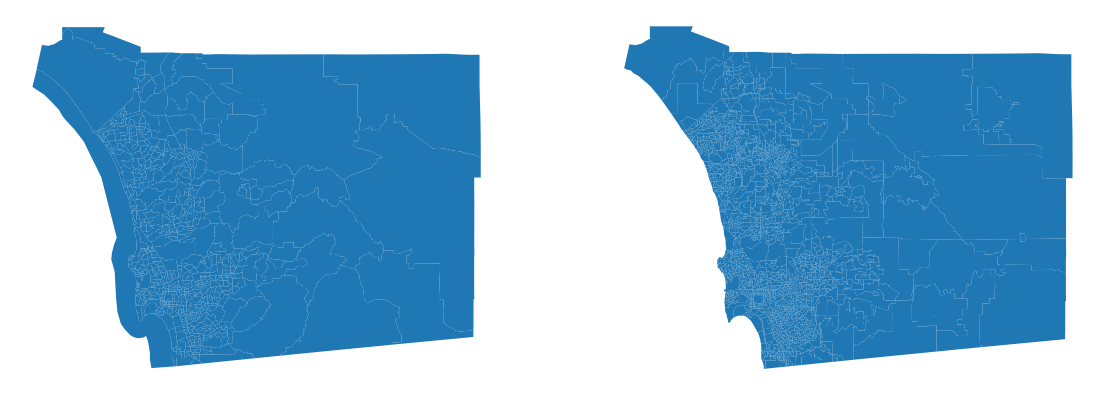

In [3]:
fig, ax = plt.subplots(1,2, figsize=(14,7))

tract.plot(ax=ax[0])
prec.plot(ax=ax[1])

for ax in ax:
    ax.axis('off')

In [4]:
prec["predem"]= prec.USPDEM01 / (prec.USPDEM01 + prec.USPREP01)

In [5]:
prec["vote_tot"] = prec.USPDEM01 + prec.USPREP01

In [6]:
prec.head()

,index,SRPREC,COUNTY_x,ELECTION,PREC_TYPE,FIPS_CODE,SRPREC_KEY,COUNTY_y,USPREP01,USPDEM01,pdem,geometry,predem,vote_tot
0,16572,181200,073,g24,SRPREC,06073,06073181200,37,503.0,716.0,0.5,"POLYGON ((-117.06416 32.79388, -117.06413 32.7...",0.587367,1219.0
1,16573,505710,073,g24,SRPREC,06073,06073505710,37,346.0,450.0,0.5,"POLYGON ((-117.01473 32.72809, -117.01469 32.7...",0.565327,796.0
2,16574,428610,073,g24,SRPREC,06073,06073428610,37,354.0,243.0,0.5,"MULTIPOLYGON (((-117.2141 33.17722, -117.21405...",0.407035,597.0
3,16575,428611,073,g24,SRPREC,06073,06073428611,37,272.0,199.0,0.5,"MULTIPOLYGON (((-117.21068 33.19338, -117.2106...",0.422505,471.0
4,16576,125270,073,g24,SRPREC,06073,06073125270,37,408.0,639.0,0.5,"POLYGON ((-117.26545 32.84337, -117.26545 32.8...",0.610315,1047.0


In [7]:
tract.head()

,tract,TotalPop,TRACTCE,GEOID,geometry
0,8331,2766.0,8331,06073008331,"POLYGON ((-117.23082 32.94176, -117.23079 32.9..."
1,8336,2086.0,8336,06073008336,"POLYGON ((-117.13793 32.96927, -117.13792 32.9..."
2,8337,4996.0,8337,06073008337,"POLYGON ((-117.14678 32.95497, -117.14657 32.9..."
3,11601,5796.0,11601,06073011601,"POLYGON ((-117.10356 32.6672, -117.10314 32.66..."
4,11602,3671.0,11602,06073011602,"POLYGON ((-117.10154 32.66202, -117.10133 32.6..."


In [7]:
area_interpolate?

Signature:
area_interpolate(
    source_df,
    target_df,
    extensive_variables=None,
    intensive_variables=None,
    table=None,
    allocate_total=True,
    spatial_index='auto',
    n_jobs=1,
    categorical_variables=None,
    categorical_frequency=True,
)
Docstring:
Area interpolation for extensive, intensive and categorical variables.

Parameters
----------
source_df : geopandas.GeoDataFrame

target_df : geopandas.GeoDataFrame

extensive_variables : list
    [Optional. Default=None] Columns in dataframes for extensive variables

intensive_variables : list
    [Optional. Default=None] Columns in dataframes for intensive variables

table : scipy.sparse.csr_matrix
    [Optional. Default=None] Area allocation source-target correspondence
    table. If not provided, it will be built from `source_df` and
    `target_df` using `tobler.area_interpolate._area_tables_binning`

allocate_total : boolean
    [Optional. Default=True] True if total value of source area should be
    alloca

In [8]:
target_crs = "EPSG:26911"

prec = prec.to_crs(target_crs)
tract = tract.to_crs(target_crs)

In [10]:
prec  = prec.explode(index_parts=False, ignore_index=True)
tract = tract.explode(index_parts=False, ignore_index=True)


In [13]:
from shapely import make_valid, set_precision

In [14]:
#fix self-intersections etc.
prec["geometry"]  = prec.geometry.apply(make_valid)
tract["geometry"] = tract.geometry.apply(make_valid)

In [15]:
results = area_interpolate(source_df=prec, target_df=tract, intensive_variables=['predem'], extensive_variables=['vote_tot'])


C:\Users\ttibb\miniforge3\envs\backup\Lib\site-packages\tobler\util\util.py:60: UserWarning: nan values in variable: vote_tot, replacing with 0
  warn(f"nan values in variable: {column}, replacing with 0")
C:\Users\ttibb\miniforge3\envs\backup\Lib\site-packages\tobler\util\util.py:60: UserWarning: nan values in variable: predem, replacing with 0
  warn(f"nan values in variable: {column}, replacing with 0")


In [19]:
results.to_file("tractVOTES.shp")
